# Telecom Churn Prediction | Decision Tree Classifier

## Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
pd.set_option('display.max_columns', None)

## Load preprocessed data

In [3]:
df_preprocessed = pd.read_csv("../data/processed/telco_churn_encoded.csv")

In [4]:
df_preprocessed.head()

,tenure,MonthlyCharges,TotalCharges,service_count,loyalty_score,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,2,0.0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,4,113.9,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,4,0.0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,4,126.9,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,2,0.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [5]:
df_preprocessed.describe(include='all')

,tenure,MonthlyCharges,TotalCharges,service_count,loyalty_score,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,4.146244,187.733260,0.504756,0.162147,0.483033,0.299588,0.903166,0.096834,0.421837,0.439585,0.216669,0.216669,0.286668,0.216669,0.344881,0.216669,0.343888,0.216669,0.290217,0.216669,0.384353,0.216669,0.387903,0.209144,0.240664,0.592219,0.216101,0.335794,0.228880,0.265370
std,24.559481,30.090047,2266.794470,2.312720,237.146015,0.500013,0.368612,0.499748,0.458110,0.295752,0.295752,0.493888,0.496372,0.412004,0.412004,0.452237,0.412004,0.475363,0.412004,0.475038,0.412004,0.453895,0.412004,0.486477,0.412004,0.487307,0.406726,0.427517,0.491457,0.411613,0.472301,0.420141,0.441561
min,0.000000,18.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.500000,398.550000,2.000000,20.150000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,70.350000,1394.550000,4.000000,86.250000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,89.850000,3786.600000,6.000000,254.200000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,72.000000,118.750000,8684.800000,9.000000,950.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Train test Split

In [6]:
y = df_preprocessed['Churn_Yes']
X = df_preprocessed.drop(columns=['Churn_Yes'])

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 32)
(1409, 32)
(5634,)
(1409,)


## Decision Tree Model

### Import and initialize model

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dt_clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)

### Training the model

In [12]:
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

### Checking the accuracy of testing dataset

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
predictions_test = dt_clf.predict(x_test)

In [15]:
dt_clf.score(x_test, y_test)

0.7459190915542938

### Checking the training accuracy

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
predictions_train = dt_clf.predict(x_train)
accuracy_score(y_train, predictions_train)

0.9984025559105432

By looking at the testing accuracy and the training accuracy we can see that the model has overfitted

### Visualizing decision tree

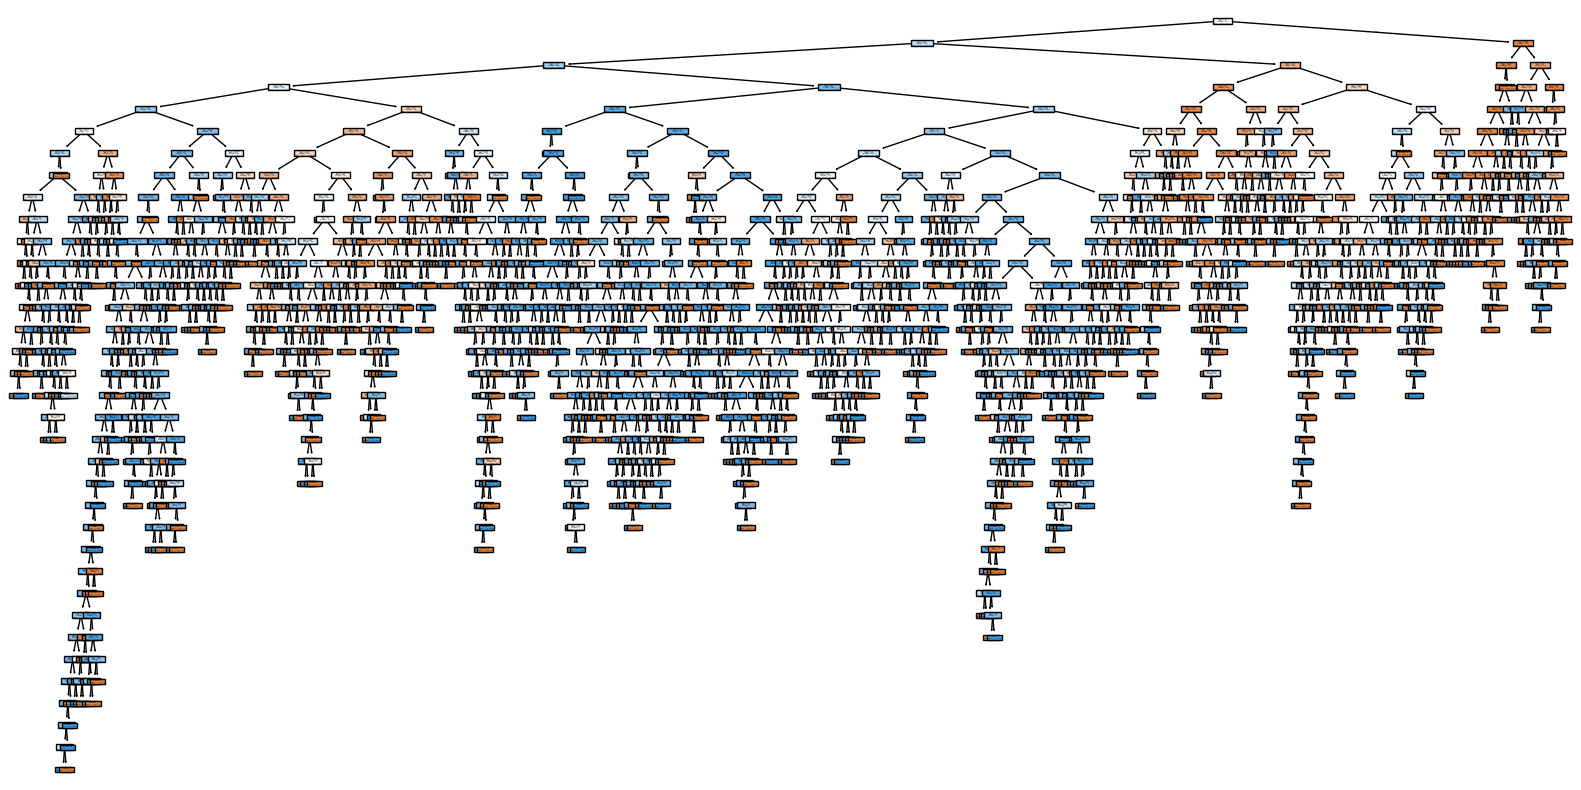

In [18]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_clf, filled=True)
plt.show()

## Model Evaluation

### Evaluating test dataset

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

In [20]:
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1036
           1       0.52      0.51      0.52       373

    accuracy                           0.75      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.74      0.75      0.75      1409



### Confusion Matrix

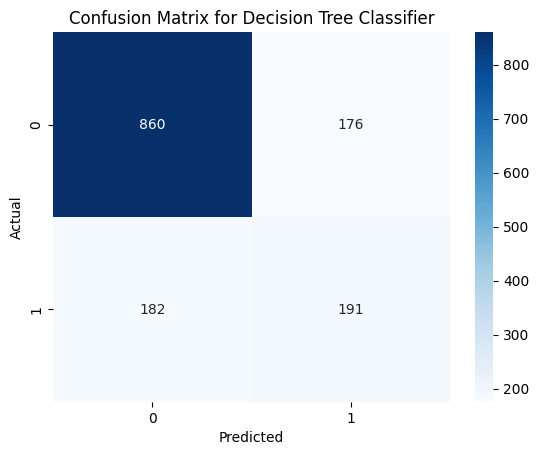

In [21]:
sns.heatmap(confusion_matrix(y_test, predictions_test), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

### Feature Importance

C:\Users\sanid\AppData\Local\Temp\ipykernel_32584\1708359731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fi.values, y=fi.index, palette="viridis")


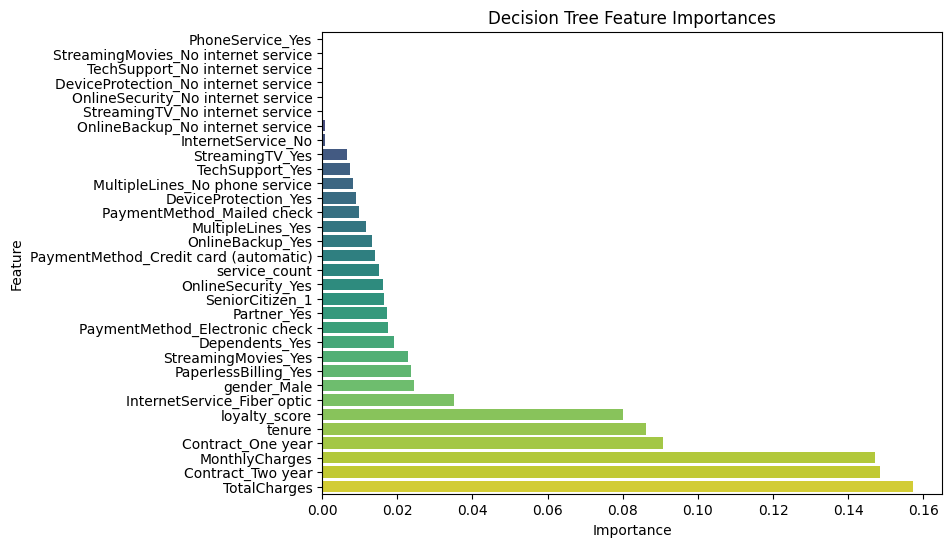

In [22]:
fi = pd.Series(dt_clf.feature_importances_, index=x_train.columns).sort_values()

plt.figure(figsize=(8,6))
sns.barplot(x=fi.values, y=fi.index, palette="viridis")
plt.title("Decision Tree Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### Evaluating training dataset

In [23]:
print(classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       0.99      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



### Finding false positive rate and true positive rate

In [24]:
from sklearn.metrics import roc_curve, auc

In [25]:
dt_probs = dt_clf.predict_proba(x_test)[:, 1]

In [26]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs)

### Plotting ROC curve for the decision tree

In [27]:
auc_score_dt = auc(fpr_dt, tpr_dt)
auc_score_dt

np.float64(0.6716050596747648)

Since the AUC (Area Under the ROC Curve) is close to 0.5, the model is likely random guessing

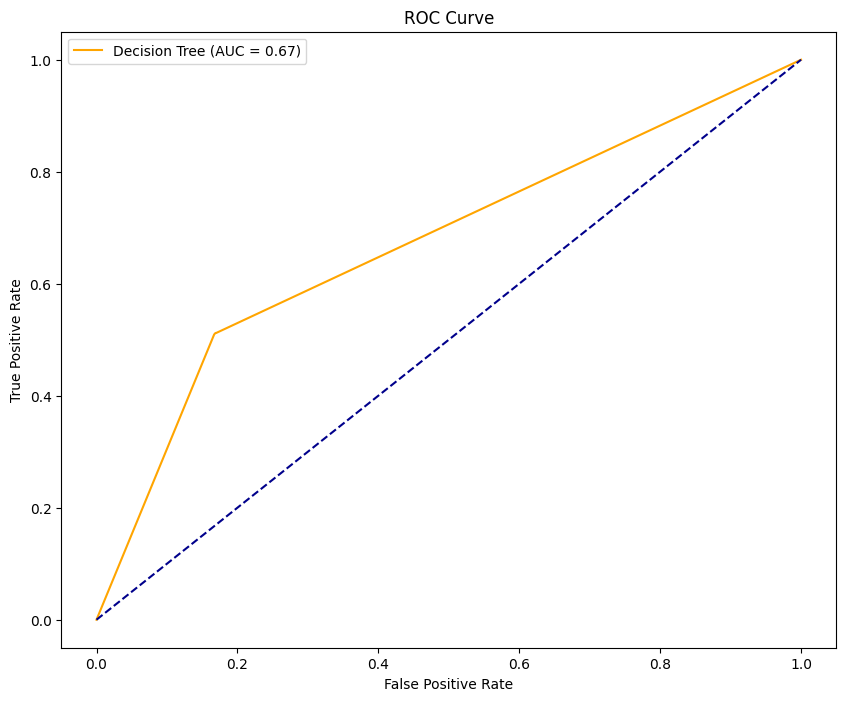

In [28]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_score_dt:.2f})', color='orange')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--') # diagonal line as the baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Pruning the Decision Tree

In [29]:
path = dt_clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

### Visualizing alpha with respect to impurity of leaves

Text(0.5, 1.0, 'Total Impurity vs Effective alpha for training set')

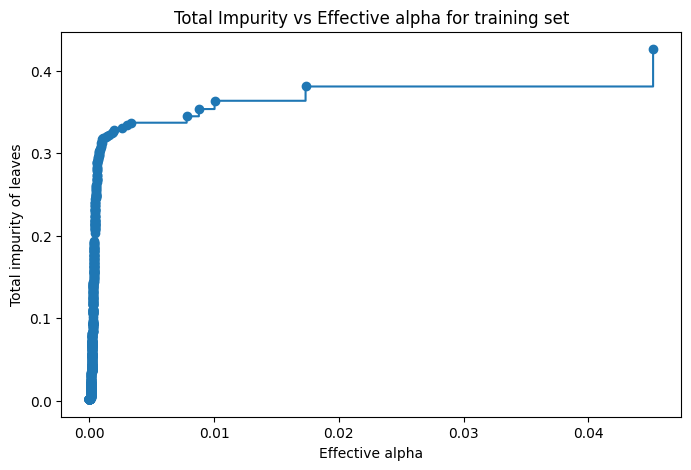

In [30]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o',drawstyle='steps-post')
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total Impurity vs Effective alpha for training set")

Findings of the graph


*   At very small alpha values, impurity is near 0 - therefore tree is complex, and almost perfectly fitting the training data (overfitting).
*   The impurity stabilizes around 0.35 to 0.4 for larger alpha values, this means the tree is simpler but leaves are less pure
* A good trade-off is around alpha = 0.005 to 0.01


In [31]:
dt_clfs = []
for ccp_alpha in ccp_alphas:
  dt_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  dt_clf.fit(x_train, y_train)
  dt_clfs.append(dt_clf)
print("Number of nodes in the last tree is : {} with ccp_alpha: {}".format(
    dt_clfs[-1].tree_.node_count, ccp_alphas[-1]
))

Number of nodes in the last tree is : 1 with ccp_alpha: 0.07402591031938005


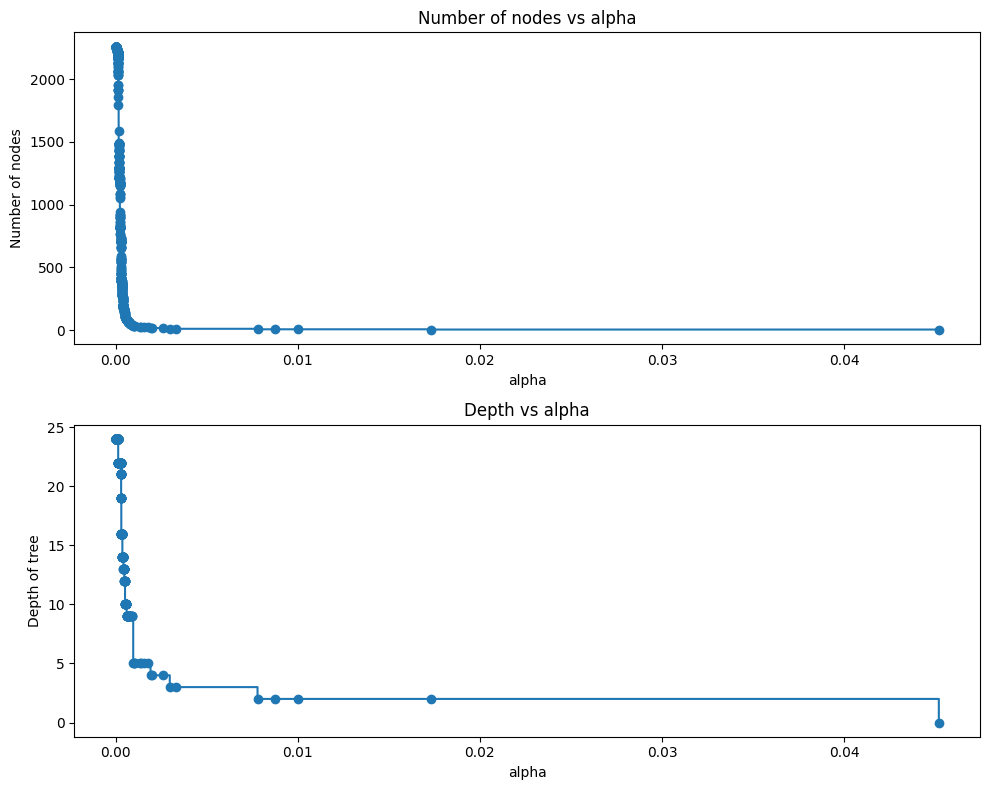

In [32]:
dt_clfs = dt_clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [dt_clf.tree_.node_count for dt_clf in dt_clfs]
depth = [dt_clf.tree_.max_depth for dt_clf in dt_clfs]
fig, ax = plt.subplots(2,1, figsize=(10,8))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle='steps-post')
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle='steps-post')
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

train_scores = [dt_clf.score(x_train, y_train) for dt_clf in dt_clfs]
test_scores = [dt_clf.score(x_test, y_test) for dt_clf in dt_clfs]
auc_scores = [auc(*roc_curve(y_test, dt_clf.predict_proba(x_test)[:,1])[:2]) for dt_clf in dt_clfs]
precision_scores = [precision_score(y_test, dt_clf.predict(x_test), average='weighted') for dt_clf in dt_clfs]
recall_scores    = [recall_score(y_test, dt_clf.predict(x_test), average='weighted') for dt_clf in dt_clfs]
f1_scores        = [f1_score(y_test, dt_clf.predict(x_test), average='weighted') for dt_clf in dt_clfs]

c:\Users\sanid\VS Projects\Telecom_Churn_Prediction\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
def print_metrics_at_index(alpha_lower_range=0, alpha_higher_range=len(ccp_alphas)-1):
    
    zoom_mask = [a >= alpha_lower_range and a <= alpha_higher_range for a in ccp_alphas]
    
    zoom_alphas = [a for a, m in zip(ccp_alphas, zoom_mask) if m]
    zoom_train  = [s for s, m in zip(train_scores, zoom_mask) if m]
    zoom_test   = [s for s, m in zip(test_scores, zoom_mask) if m]
    zoom_auc    = [s for s, m in zip(auc_scores, zoom_mask) if m]
    zoom_prec   = [s for s, m in zip(precision_scores, zoom_mask) if m]
    zoom_rec    = [s for s, m in zip(recall_scores, zoom_mask) if m]
    zoom_f1     = [s for s, m in zip(f1_scores, zoom_mask) if m]

    fig, ax = plt.subplots(figsize=(10,8))
    ax.set_xlabel("alpha")
    ax.set_ylabel("Score")
    ax.set_title(f"Metrics vs alpha (Zoomed to {alpha_lower_range:.4f} - {alpha_higher_range:.4f})")
    ax.plot(zoom_alphas, zoom_train, marker='o', label="train", drawstyle="steps-post", linewidth=1, zorder=3)
    ax.plot(zoom_alphas, zoom_test,  marker='o', label="test", drawstyle="steps-post", linewidth=1, zorder=3)
    ax.plot(zoom_alphas, zoom_auc,   marker='o', label="AUC", drawstyle="steps-post", linewidth=1, zorder=3)
    ax.plot(zoom_alphas, zoom_prec, marker='o', label="Precision", drawstyle="steps-post", alpha=0.2, zorder=1)
    ax.plot(zoom_alphas, zoom_rec,  marker='o', label="Recall", drawstyle="steps-post", alpha=0.2, zorder=1)
    ax.plot(zoom_alphas, zoom_f1,   marker='o', label="F1 Score", drawstyle="steps-post", alpha=0.2, zorder=1)

    ax.legend()
    plt.grid()
    plt.show()


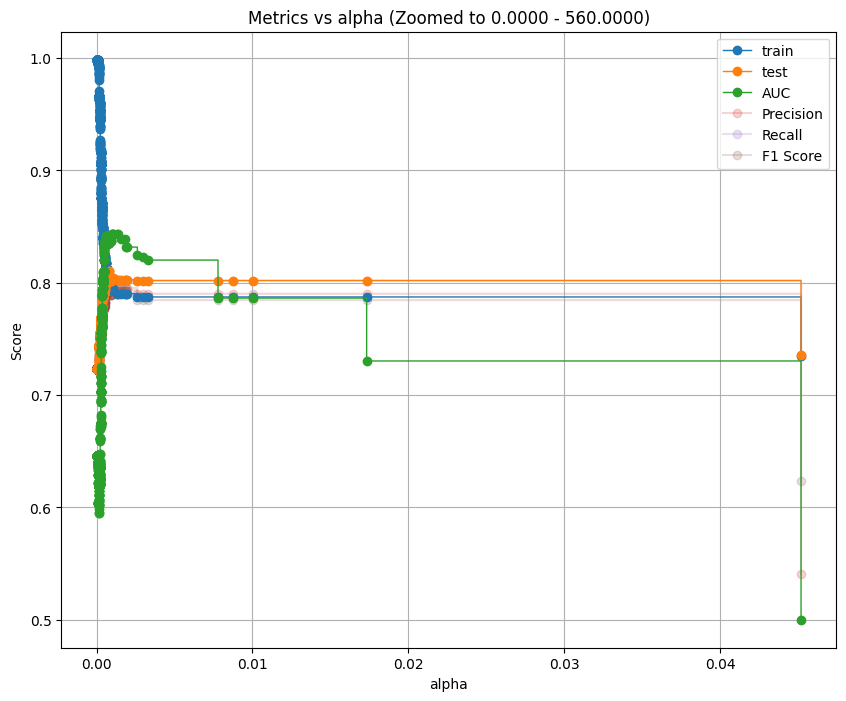

In [35]:
print_metrics_at_index()

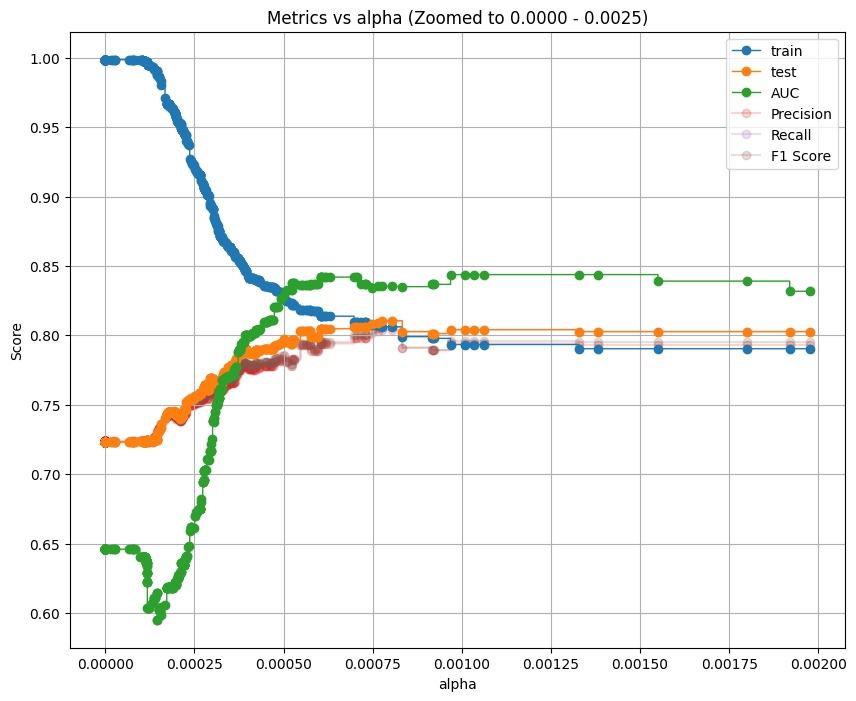

In [36]:
print_metrics_at_index(0, 0.0025)

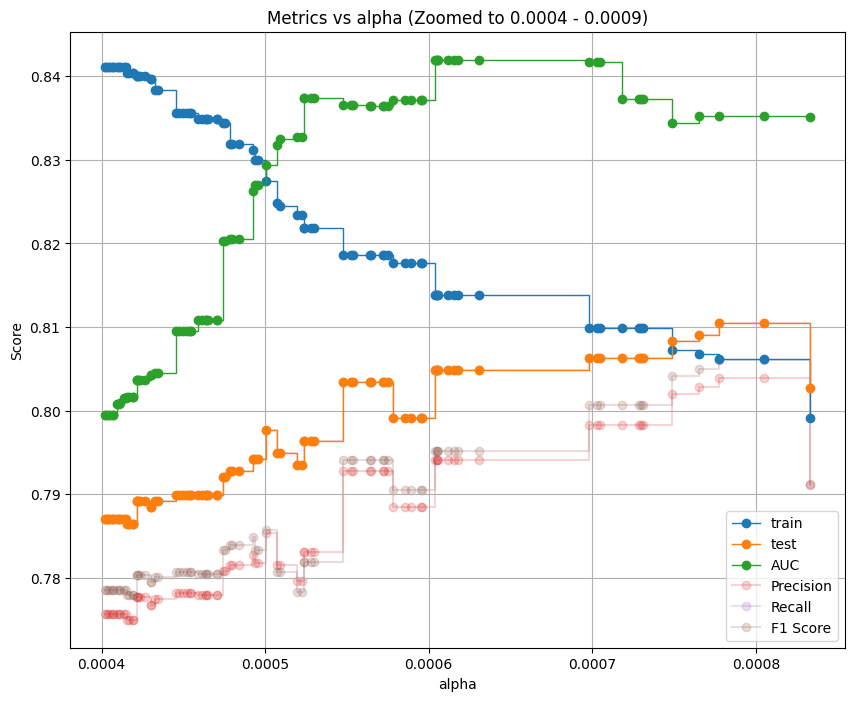

In [37]:
print_metrics_at_index(0.0004, 0.0009)

After the visualization, it is clear that the best performance of the model comes around alpha=0.0007 - with the highest AUC value and with a higher test score.
The F1-Scores, Precision and Recall mostly correlates with the test scores, therefore choosing a higher test value could lead to a better performing model

### Selecting the best alpha with highest test accuracy

In [38]:
np.argmax(test_scores) == np.argmax(auc_scores)

np.False_

In [39]:
best_alpha = np.argmax(auc_scores)
best_test = np.argmax(test_scores)

In [40]:
for i in range(best_alpha - 20, best_alpha + 8):
    if i == best_alpha:
        print("*" , end="")
    if i == best_test:
        print("#" , end="")
    print(f"Alpha: {ccp_alphas[i]:.6f} | Train Acc: {train_scores[i]:.4f} | Test Acc: {test_scores[i]:.4f} | AUC: {auc_scores[i]:.4f} | Precision: {precision_scores[i]:.4f} | Recall: {recall_scores[i]:.4f} | F1 Score: {f1_scores[i]:.4f}")

Alpha: 0.000631 | Train Acc: 0.8138 | Test Acc: 0.8048 | AUC: 0.8420 | Precision: 0.7941 | Recall: 0.8048 | F1 Score: 0.7951
Alpha: 0.000698 | Train Acc: 0.8099 | Test Acc: 0.8062 | AUC: 0.8417 | Precision: 0.7983 | Recall: 0.8062 | F1 Score: 0.8006
Alpha: 0.000703 | Train Acc: 0.8099 | Test Acc: 0.8062 | AUC: 0.8417 | Precision: 0.7983 | Recall: 0.8062 | F1 Score: 0.8006
Alpha: 0.000705 | Train Acc: 0.8099 | Test Acc: 0.8062 | AUC: 0.8417 | Precision: 0.7983 | Recall: 0.8062 | F1 Score: 0.8006
Alpha: 0.000718 | Train Acc: 0.8099 | Test Acc: 0.8062 | AUC: 0.8372 | Precision: 0.7983 | Recall: 0.8062 | F1 Score: 0.8006
Alpha: 0.000729 | Train Acc: 0.8099 | Test Acc: 0.8062 | AUC: 0.8372 | Precision: 0.7983 | Recall: 0.8062 | F1 Score: 0.8006
Alpha: 0.000730 | Train Acc: 0.8099 | Test Acc: 0.8062 | AUC: 0.8372 | Precision: 0.7983 | Recall: 0.8062 | F1 Score: 0.8006
Alpha: 0.000731 | Train Acc: 0.8099 | Test Acc: 0.8062 | AUC: 0.8372 | Precision: 0.7983 | Recall: 0.8062 | F1 Score: 0.8006


After considering the value the best alpha is 0.000703

In [41]:
target_alpha = 0.000703
best_index = min(range(len(ccp_alphas)), key=lambda i: abs(ccp_alphas[i] - target_alpha))

In [42]:
best_alpha = ccp_alphas[best_index]
best_test_acc = test_scores[best_index]
train_acc = train_scores[best_index]
best_auc = auc_scores[best_index]
print(f"Best alpha: {best_alpha:.6f}\nTrain Accuracy: {train_acc:.4f}\nTest Accuracy: {best_test_acc:.4f}\nAUC: {best_auc:.4f}")

Best alpha: 0.000703
Train Accuracy: 0.8099
Test Accuracy: 0.8062
AUC: 0.8417


### Model after pruning

In [43]:
dt_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0007030073257585367),
                       random_state=42)

### Accuracy of test dataset

In [44]:
pred_test = dt_clf.predict(x_test)
accuracy_score(y_test, pred_test)

0.8062455642299503

### Accuracy of training dataset

In [45]:
pred_train = dt_clf.predict(x_train)
accuracy_score(y_train, pred_train)

0.8099041533546326

### Visualizing after pruning

[Text(0.49765625, 0.95, 'x[0] <= 16.5\ngini = 0.39\nsamples = 5634\nvalue = [4138, 1496]'),
 Text(0.29375, 0.85, 'x[12] <= 0.5\ngini = 0.496\nsamples = 2025\nvalue = [1106, 919]'),
 Text(0.39570312500000004, 0.8999999999999999, 'True  '),
 Text(0.2125, 0.75, 'x[0] <= 3.5\ngini = 0.413\nsamples = 1165\nvalue = [825, 340]'),
 Text(0.125, 0.65, 'x[16] <= 0.5\ngini = 0.49\nsamples = 493\nvalue = [281, 212]'),
 Text(0.075, 0.55, 'x[1] <= 60.2\ngini = 0.498\nsamples = 299\nvalue = [141, 158]'),
 Text(0.05, 0.45, 'x[28] <= 0.5\ngini = 0.492\nsamples = 270\nvalue = [118, 152]'),
 Text(0.025, 0.35, 'gini = 0.498\nsamples = 124\nvalue = [66, 58]'),
 Text(0.075, 0.35, 'gini = 0.459\nsamples = 146\nvalue = [52, 94]'),
 Text(0.1, 0.45, 'gini = 0.328\nsamples = 29\nvalue = [23, 6]'),
 Text(0.175, 0.55, 'x[2] <= 24.525\ngini = 0.402\nsamples = 194\nvalue = [140, 54]'),
 Text(0.15, 0.45, 'gini = 0.456\nsamples = 128\nvalue = [83, 45]'),
 Text(0.2, 0.45, 'gini = 0.236\nsamples = 66\nvalue = [57, 9]'),


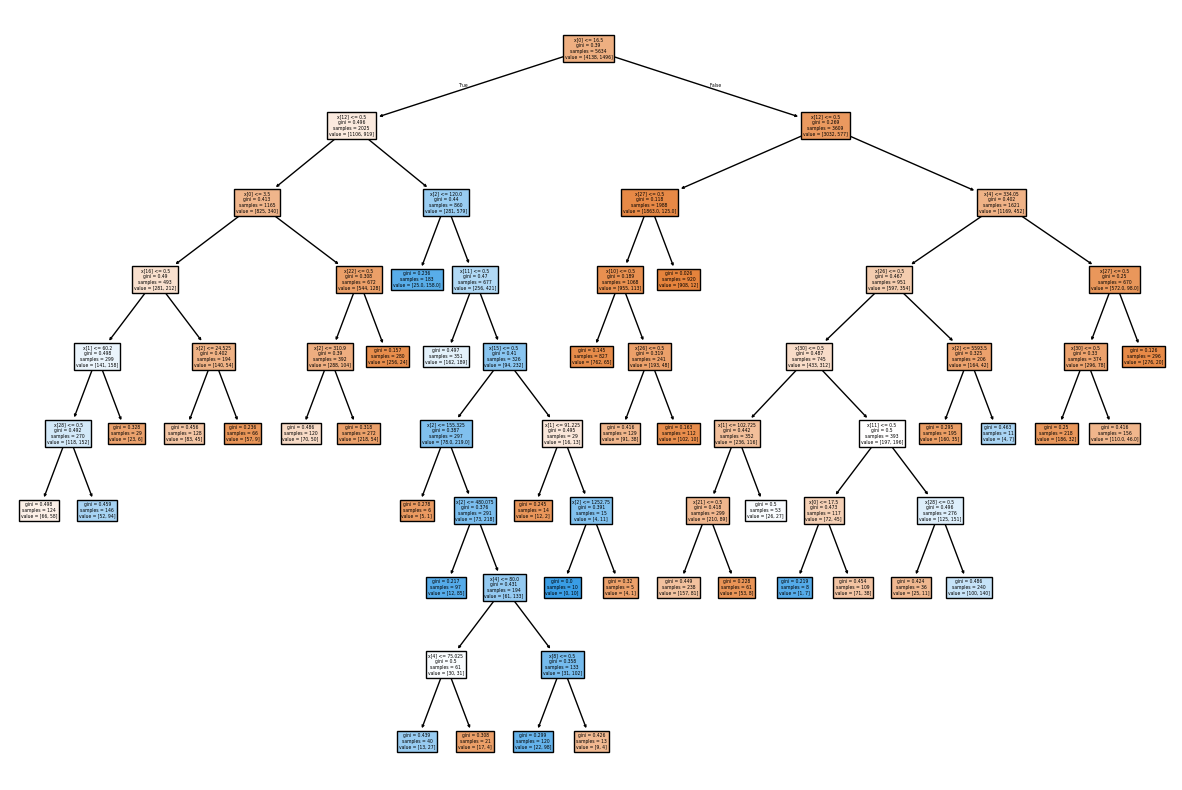

In [46]:
plt.figure(figsize=(15,10))
tree.plot_tree(dt_clf, filled=True)

## Evaluating the new model

### Evaluating with the test dataset

In [47]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.66      0.55      0.60       373

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



## Evaluating with the train dataset

In [48]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4138
           1       0.67      0.56      0.61      1496

    accuracy                           0.81      5634
   macro avg       0.76      0.73      0.74      5634
weighted avg       0.80      0.81      0.80      5634



### Finding false positive rate and true positive rate

In [49]:
dt_probs = dt_clf.predict_proba(x_test)[:,1]

In [50]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs)

### Confusion Matrix

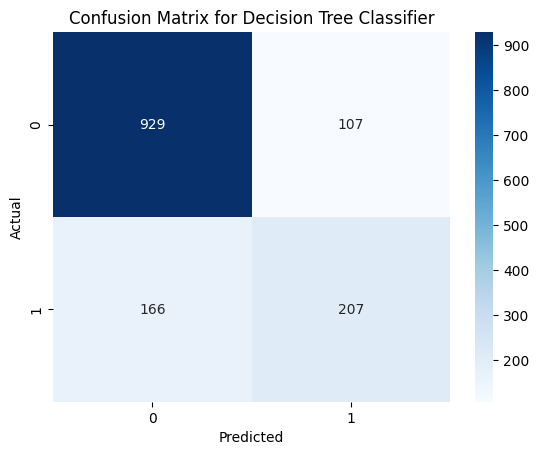

In [51]:
sns.heatmap(confusion_matrix(y_test, pred_test), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

### Plotting ROC curve for the new Decision Tree

In [52]:
auc_score_dt = auc(fpr_dt, tpr_dt)
auc_score_dt

np.float64(0.8417053112093327)

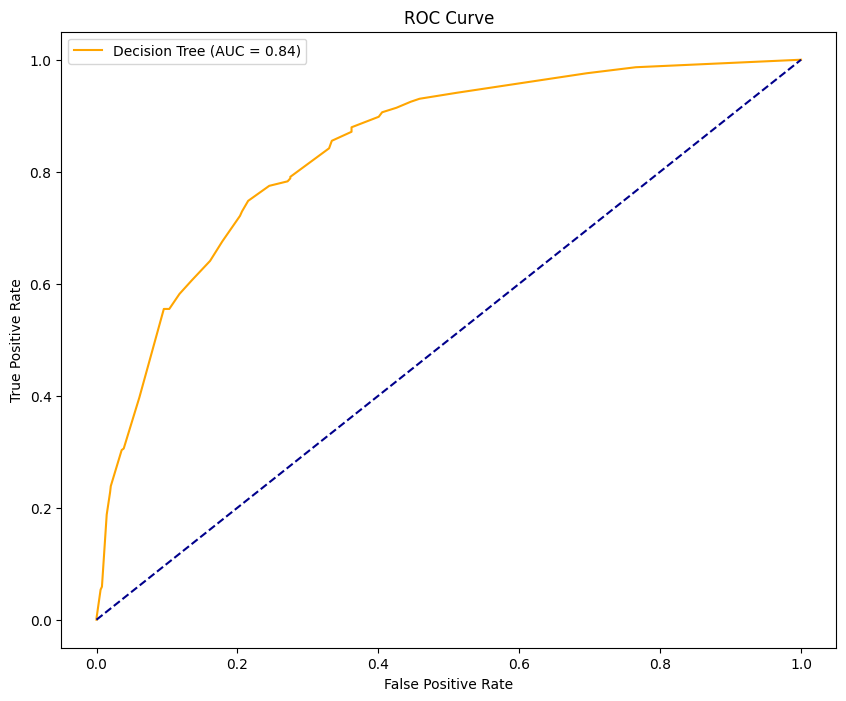

In [53]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_score_dt:.2f})', color='orange')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--') # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

C:\Users\sanid\AppData\Local\Temp\ipykernel_32584\1708359731.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fi.values, y=fi.index, palette="viridis")


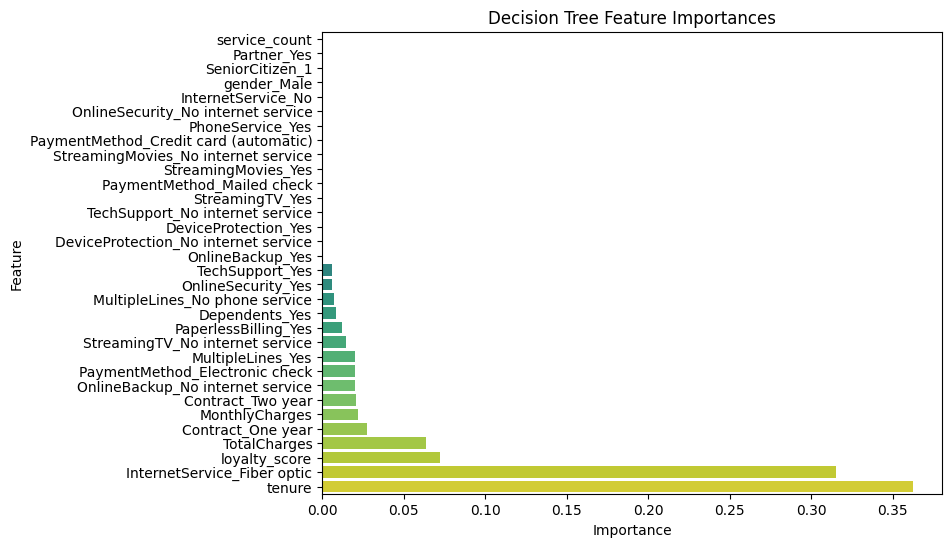

In [54]:
fi = pd.Series(dt_clf.feature_importances_, index=x_train.columns).sort_values()

plt.figure(figsize=(8,6))
sns.barplot(x=fi.values, y=fi.index, palette="viridis")
plt.title("Decision Tree Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [55]:
pd.DataFrame({'Feature': x_train.columns, 'Importance': dt_clf.feature_importances_}).sort_values(by='Importance', ascending=False)

,Feature,Importance
0,tenure,0.362042
12,InternetService_Fiber optic,0.315298
4,loyalty_score,0.072437
2,TotalCharges,0.063925
26,Contract_One year,0.027694
1,MonthlyCharges,0.021823
27,Contract_Two year,0.020916
16,OnlineBackup_No internet service,0.020419
30,PaymentMethod_Electronic check,0.020282
11,MultipleLines_Yes,0.020089


After pruning there is a major peformance increase when making new predictions.

After pruning,

*   The model reduced overfitting
*   Maintained good accuracy (0.80)
*   Improved generalization
*   Smooth ROC curve and high AUC score (0.84)
*   tenure and InternelService as fiber optic, shows the highest importance of the model
*   The engineered feature, "loyalty_score" shows a key importance in the decision tree model, but the service_count features does not tends to show any importance for the decision tree model

